# Project 3 : 2-EDA

## Problem statement

> Create the model to predict where the given post came from between cat and dog post

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import demoji
demoji.download_codes()

/var/folders/yr/lt5kfbcj2vs6bwkkyhxsp_0c0000gn/T/ipykernel_44298/3271241802.py:7: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

## Lemmatization
from nltk import word_tokenize   
from nltk.stem import WordNetLemmatizer
import re
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        regex_num_ponctuation = '(\d+)|([^\w\s])'
        regex_little_words = r'(\b\w{1,2}\b)'
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) 
                if not re.search(regex_num_ponctuation, t) and not re.search(regex_little_words, t)]
# got this from https://stackoverflow.com/questions/47423854/sklearn-adding-lemmatizer-to-countvectorizer

## Stemming
import nltk.stem    
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])
# got this from https://stackoverflow.com/questions/36182502/add-stemming-support-to-countvectorizer-sklearn

> Snowball Stemmer: It is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer since some issues of it were fixed in this stemmer. https://www.geeksforgeeks.org/snowball-stemmer-nlp/

### Import Data from step 1

In [3]:
df_cat = pd.read_csv('../data/cat_all.csv')
df_dog = pd.read_csv('../data/dog_all.csv')
df_cat.shape, df_dog.shape

((5000, 2), (4999, 2))

In [4]:
df_cat.head()

,subreddit,title
0,cat,🐱
1,cat,The “how is it only Wednesday?!” mood - 😄 (OC)
2,cat,The Most Wonderful Time Of Year
3,cat,My grumpy boy doesn’t like being cuddled.
4,cat,If I fits it sits!


In [5]:
df_dog.head()

,subreddit,title
0,DOG,"Dog got quilled by porcupine, now has cellulit..."
1,DOG,Moved to a new house with a significantly bigg...
2,DOG,PLEASE HELP THESE DOGS! 🙏🏻❤️🥹
3,DOG,lil tongue poking out
4,DOG,via: @agea_santos


### EDA

In [6]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  5000 non-null   object
 1   title      5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [7]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  4999 non-null   object
 1   title      4999 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


#### Check subreddit category

In [8]:
set(df_cat['subreddit']), set(df_dog['subreddit'])

({'cat',
  'u_-Tux-cat-',
  'u_Accomplished-Cat-167',
  'u_Accomplished-Cat-619',
  'u_Advanced-Cat-876',
  'u_Adventurous-Cat-3616',
  'u_Affectionate-Cat-873',
  'u_Aggravating-Cat-8346',
  'u_Alternative-Cat-4173',
  'u_Apprehensive-Cat-709',
  'u_Available-Cat-7440',
  'u_Background-Cat-1512',
  'u_Beneficial-Cat-7203',
  'u_Big-Cat-5589',
  'u_Brilliant-Cat-1588',
  'u_Brilliant-Cat-6096',
  'u_Carl-the-reddit-cat',
  'u_Coder-Cat',
  'u_Comfortable-Cat-9396',
  'u_Competitive-Cat-7134',
  'u_Creepy-Cat-8796',
  'u_Cute-Sissy-Cat',
  'u_Dull-Cat-2998',
  'u_Eastern-Cat-1199',
  'u_Eastern-Cat-523',
  'u_Educational-Cat-7560',
  'u_Effective-Cat-4210',
  'u_Electrical-Cat-4725',
  'u_Embarrassed-Cat-3071',
  'u_Emotional-Cat-4336',
  'u_Euphoric-Cat-7461',
  'u_Excellent-Cat-7021',
  'u_Exciting-Cat-4606',
  'u_Far-Cat-6124',
  'u_Flimsy-Cat-6555',
  'u_Fun-Cat-3028',
  'u_Glass-Cat-66',
  'u_Gloomy-Cat-735',
  'u_Gullible-Cat-2299',
  'u_Hairy-Cat-2754',
  'u_Hefty-Cat-868',
  'u_

#### Remove unwant subreddit category

In [9]:
df_cat = df_cat[df_cat['subreddit']=='cat']
df_dog = df_dog[df_dog['subreddit']=='DOG']
df_cat.shape, df_dog.shape

((4471, 2), (4568, 2))

### Looking for any duplicates title

In [10]:
df_cat[df_cat.duplicated(['title'])]
# got this from https://www.statology.org/pandas-find-duplicates/

,subreddit,title
13,cat,beatiful cats
58,cat,my king of the jungle🤭😍
71,cat,This time it is it from the left hug
286,cat,Call me crazy but what if cats know we see the...
291,cat,Sunday mood
...,...,...
4897,cat,"God has entered into my body, as a Ghost body!..."
4924,cat,Big chomp
4928,cat,Would you squeeze my cheeks?
4952,cat,Big chomp


In [11]:
df_dog[df_dog.duplicated(['title'])]

,subreddit,title
89,DOG,Humans being Heros | by u/tarikdz5
155,DOG,"God entered into my body, like an angelic fire..."
233,DOG,Today is Piper's gotcha day 😍💕
412,DOG,50% off Discount on Pet Memorial Picture Frame...
539,DOG,What is he dreaming about?
...,...,...
4930,DOG,"Age progression of my sweet Jackabee, Bailey ❤️"
4955,DOG,What should I do?
4961,DOG,dogo
4982,DOG,Sleepy doggo


#### Remove duplicates

In [12]:
df_cat.drop_duplicates(subset="title", keep=False, inplace=True)
df_dog.drop_duplicates(subset="title", keep=False, inplace=True)
df_cat.shape, df_dog.shape
# got this from https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

((4121, 2), (4301, 2))

### Until now we have data left around 4,000 posts for each category

### Distribution of post lengths

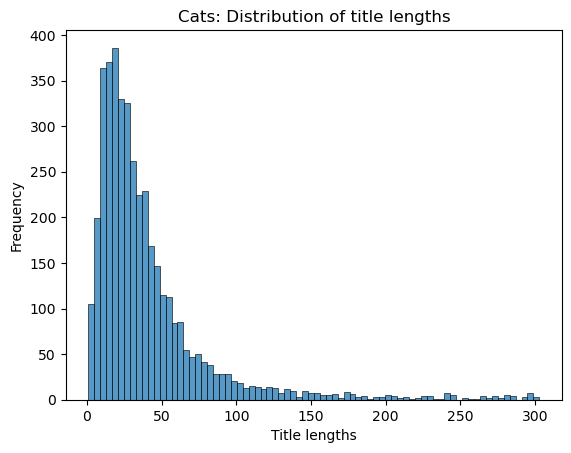

In [13]:
df_cat['title_length'] = df_cat['title'].map(lambda x: len(x))
sns.histplot(df_cat['title_length']).set(title='Cats: Distribution of title lengths', ylabel='Frequency', xlabel='Title lengths');
plt.savefig('../image/cat_distribution.png')

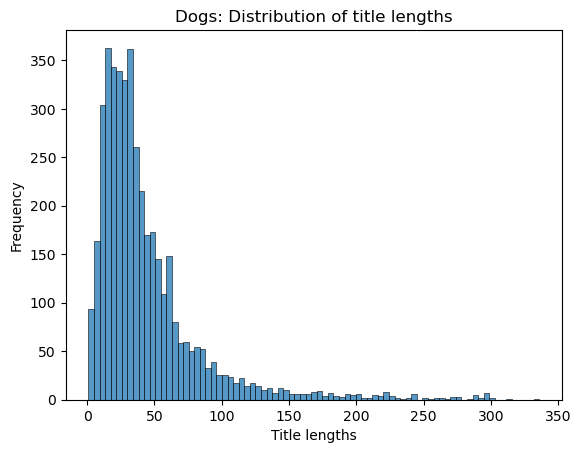

In [14]:
df_dog['title_length'] = df_dog['title'].map(lambda x: len(x))
sns.histplot(df_dog['title_length']).set(title='Dogs: Distribution of title lengths', ylabel='Frequency', xlabel='Title lengths');
plt.savefig('../image/dog_distribution.png')

In [15]:
df_cat.describe()

,title_length
count,4121.000000
mean,40.820432
std,42.687494
min,1.000000
25%,16.000000
50%,28.000000
75%,48.000000
max,303.000000


In [16]:
df_dog.describe()

,title_length
count,4301.000000
mean,44.527552
std,42.271855
min,1.000000
25%,19.000000
50%,33.000000
75%,53.000000
max,336.000000


#### > Dog posts have longer post lengths than cats.

# Word Counts by Vectorize the text

## Most common words

- ### Cats

In [17]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df_cat['title'])
status_cvec = cvec.transform(df_cat['title'])
cat_cvec = pd.DataFrame(status_cvec.toarray(), columns=cvec.get_feature_names_out())

In [18]:
cat_cvec.sum(axis=0).sort_values(ascending=False).head(15)

cat          1251
cats          265
like          166
cute          146
love          135
little        133
just          130
kitten        126
new           118
kitty         116
baby          107
help           89
time           81
breed          77
christmas      76
dtype: int64

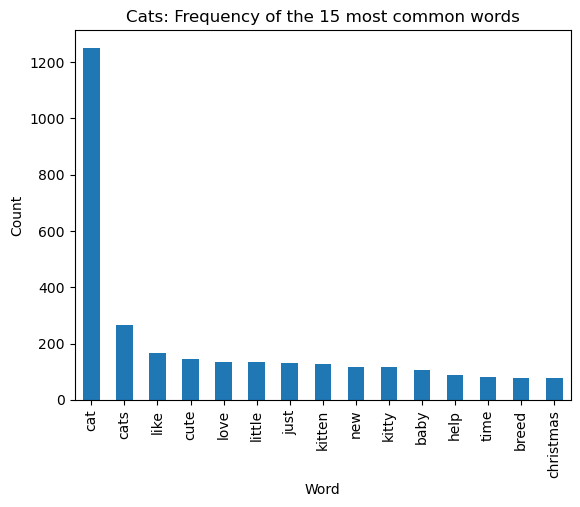

In [19]:
cat_cvec.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Cats: Frequency of the 15 most common words')
plt.xlabel('Word')
plt.ylabel('Count');

- ### Dogs

In [20]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df_dog['title'])
status_cvec = cvec.transform(df_dog['title'])
dog_cvec = pd.DataFrame(status_cvec.toarray(), columns=cvec.get_feature_names_out())

In [21]:
dog_cvec.sum(axis=0).sort_values(ascending=False).head(15)

dog       1234
dogs       267
help       178
puppy      161
breed      152
just       143
cute       143
old        137
little     133
new        124
know       124
love       118
like       113
best       108
boy        106
dtype: int64

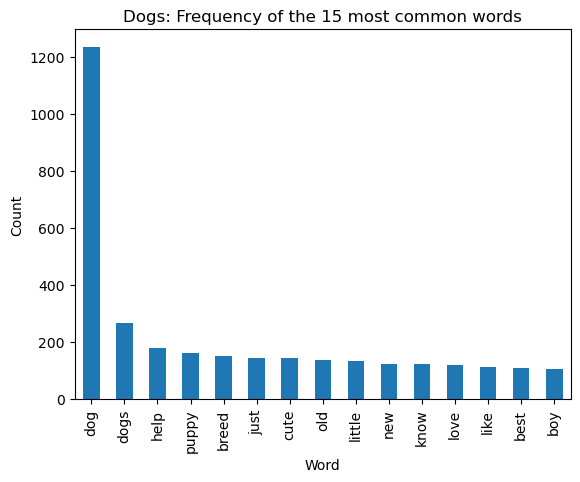

In [22]:
dog_cvec.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Dogs: Frequency of the 15 most common words')
plt.xlabel('Word')
plt.ylabel('Count');

## Most common bigrams:

- ### Cats

In [23]:
cvec = CountVectorizer(ngram_range=(2,2), stop_words='english')
cvec.fit(df_cat['title'])
cat_cvec = cvec.transform(df_cat['title'])
cat_cvec = pd.DataFrame(cat_cvec.toarray(), columns=cvec.get_feature_names_out())

In [24]:
cat_cvec.sum(axis=0).sort_values(ascending=False).head(15)

cute cat          24
breed cat         24
looks like        22
stray cat         18
christmas tree    16
does know         16
need help         16
cat breed         15
don know          14
cat loves         14
new year          13
new cat           13
years old         13
year old          13
does cat          12
dtype: int64

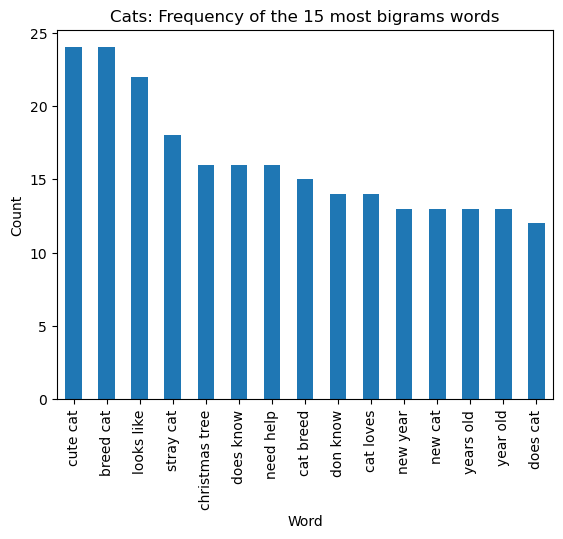

In [25]:
cat_cvec.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Cats: Frequency of the 15 most bigrams words')
plt.xlabel('Word')
plt.ylabel('Count');

- ### Dogs

In [26]:
cvec = CountVectorizer(ngram_range=(2,2), stop_words='english')
cvec.fit(df_dog['title'])
dog_cvec = cvec.transform(df_dog['title'])
dog_cvec = pd.DataFrame(dog_cvec.toarray(), columns=cvec.get_feature_names_out())

In [27]:
dog_cvec.sum(axis=0).sort_values(ascending=False).head(15)

need help          37
does know          36
breed dog          28
dog breed          27
year old           25
know breed         22
best friend        21
years old          20
cute dog           19
kind dog           19
dog breeds         19
looks like         18
months old         17
month old          16
german shepherd    15
dtype: int64

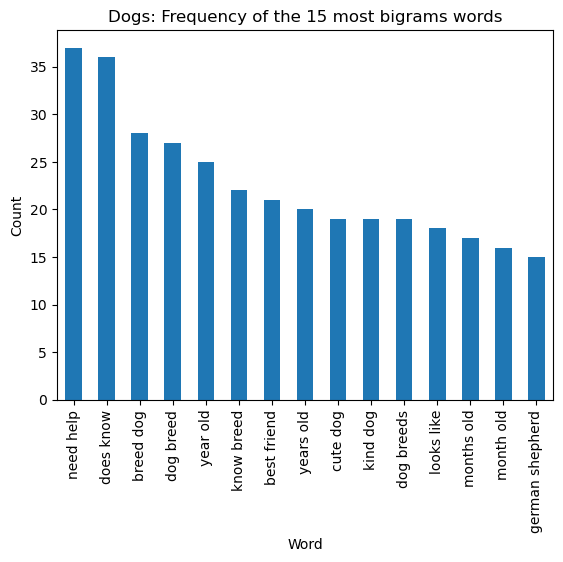

In [28]:
dog_cvec.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Dogs: Frequency of the 15 most bigrams words')
plt.xlabel('Word')
plt.ylabel('Count');

### Most common words with Lemmatizing

- ### Cat

In [29]:
def preprocessor(text):
    text = text.lower()
    text = re.sub("ha", "", text)
    text = re.sub("le", "", text)
    text = re.sub("wa", "", text)
    return text
# got this from Maria'a hackathon group code

In [30]:
cvec = CountVectorizer(
    stop_words='english', 
    tokenizer=LemmaTokenizer(),
    preprocessor=preprocessor
)
cvec.fit(df_cat['title'])
cat_cvec = cvec.transform(df_cat['title'])
cat_cvec = pd.DataFrame(cat_cvec.toarray(), columns=cvec.get_feature_names_out())

/Users/atigon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/atigon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterrds', 'alys', 'anyy', 'ast', 'beforend', 'meanwhi', 'neverthess', 'pase', 'perps', 'snt', 'tord', 'tords', 'whi', 'wtever'] not in stop_words.
  warnings.warn(


In [31]:
cat_cvec.sum(axis=0).sort_values(ascending=False).head(15)

cat       1490
like       194
love       190
kitten     161
cute       140
litt       133
just       129
kitty      123
new        118
baby       110
look       106
help        92
time        85
breed       84
doe         82
dtype: int64

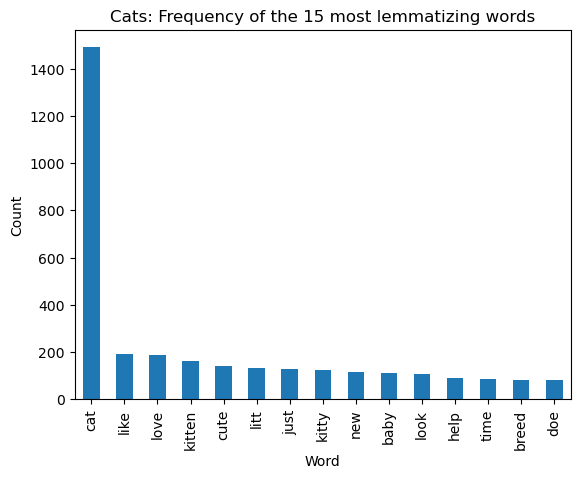

In [32]:
cat_cvec.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Cats: Frequency of the 15 most lemmatizing words')
plt.xlabel('Word')
plt.ylabel('Count');

- ### Dog

In [33]:
cvec = CountVectorizer(
    stop_words='english', 
    tokenizer=LemmaTokenizer(),
    preprocessor=preprocessor
)
cvec.fit(df_dog['title'])
dog_cvec = cvec.transform(df_dog['title'])
dog_cvec = pd.DataFrame(dog_cvec.toarray(), columns=cvec.get_feature_names_out())

/Users/atigon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/atigon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterrds', 'alys', 'anyy', 'ast', 'beforend', 'meanwhi', 'neverthess', 'pase', 'perps', 'snt', 'tord', 'tords', 'whi', 'wtever'] not in stop_words.
  warnings.warn(


In [34]:
dog_cvec.sum(axis=0).sort_values(ascending=False).head(15)

dog      1486
puppy     186
breed     184
help      181
love      166
cute      142
just      140
know      135
litt      132
old       131
like      131
new       124
boy       111
doe       111
best      108
dtype: int64

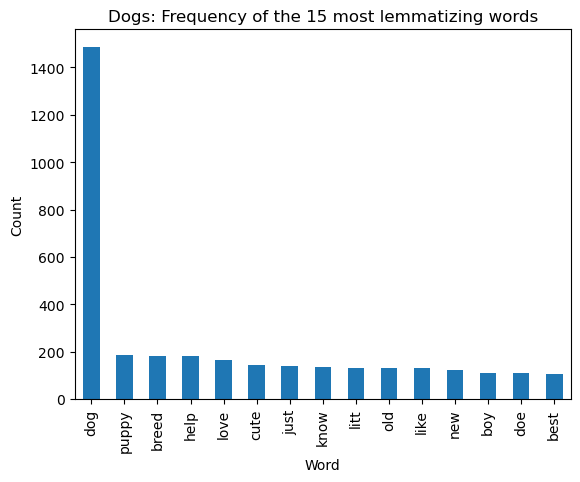

In [35]:
dog_cvec.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Dogs: Frequency of the 15 most lemmatizing words')
plt.xlabel('Word')
plt.ylabel('Count');

### Most common words with Stemming

- ### Cats

In [36]:
cvec = StemmedCountVectorizer(stop_words='english')
cvec.fit(df_cat['title'])
cat_cvec = cvec.transform(df_cat['title'])
cat_cvec = pd.DataFrame(cat_cvec.toarray(), columns=cvec.get_feature_names_out())

In [37]:
cat_cvec.sum(axis=0).sort_values(ascending=False).head(15)

cat       1517
love       223
like       203
kitten     166
cute       152
look       150
littl      134
kitti      130
just       130
babi       119
new        118
sleep      105
help       100
time        88
breed       87
dtype: int64

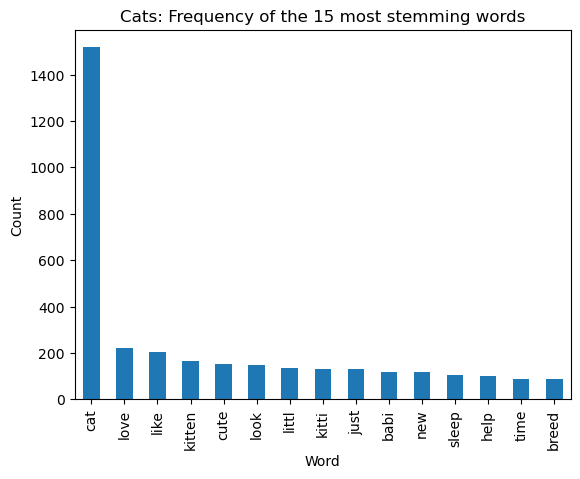

In [38]:
cat_cvec.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Cats: Frequency of the 15 most stemming words')
plt.xlabel('Word')
plt.ylabel('Count');

- ### Dogs

In [39]:
cvec = StemmedCountVectorizer(stop_words='english')
cvec.fit(df_dog['title'])
dog_cvec = cvec.transform(df_dog['title'])
dog_cvec = pd.DataFrame(dog_cvec.toarray(), columns=cvec.get_feature_names_out())

In [40]:
dog_cvec.sum(axis=0).sort_values(ascending=False).head(15)

dog      1501
love      199
help      193
puppi     190
breed     187
cute      148
just      143
look      140
know      137
old       137
like      137
littl     133
new       124
boy       116
need      116
dtype: int64

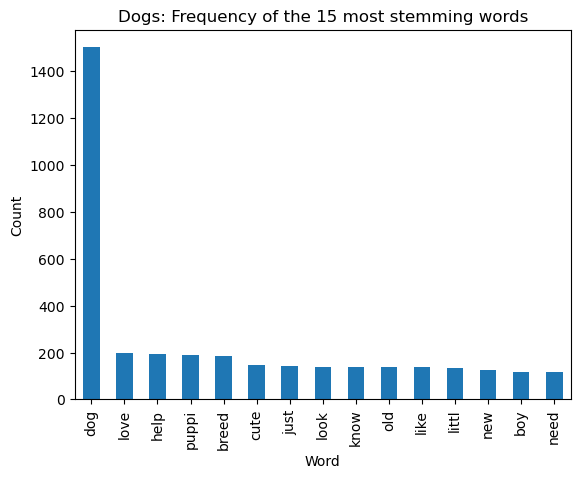

In [41]:
dog_cvec.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Dogs: Frequency of the 15 most stemming words')
plt.xlabel('Word')
plt.ylabel('Count');

In [42]:
# see what use of help in dogs
df_dog[[True if 'help' in s else False for s in df_dog.title]].sample(5)

,subreddit,title,title_length
3972,DOG,need help pls my dog keeps running away from h...,187
764,DOG,Hello! I may need your help/opinion on this on...,300
2677,DOG,my dog got sick!! help me,25
3431,DOG,help! Is this something we should be worried a...,88
2220,DOG,Need help.. is the dog water bottle worth it?,45


In [43]:
# see what use of breed in dogs
df_dog[[True if 'breed' in s else False for s in df_dog.title]].sample(5)

,subreddit,title,title_length
3129,DOG,What is your favorite dog breed?,32
2982,DOG,what breed do you think ?,25
204,DOG,What breeds do you suppose this guy is?,39
1037,DOG,Can you please help me identify my puppers bre...,131
3526,DOG,"Adopted this good boy a couple weeks ago, what...",59


## Emoji explore

- ### Cats

In [44]:
emoji_all = []
for emoji in df_cat['title']:
    if demoji.findall(emoji):
        emoji_all.append(demoji.findall(emoji))

emoji_list = []
for e in emoji_all:
    for i in e:
        emoji_list.append(i)
print('Total emoji =', len(emoji_list))

df_emoji = pd.DataFrame([emoji_list]).T
df_emoji.value_counts().head(10)

# got this from https://www.geeksforgeeks.org/convert-emoji-into-text-in-python/
# and this https://www.geeksforgeeks.org/python-accessing-key-value-in-dictionary/

Total emoji = 984


❤️    84
🥰     62
😍     59
😂     57
😻     50
🤣     34
🐈     31
🐱     29
🥺     25
😹     22
dtype: int64

- ### Dogs

In [45]:
emoji_all = []
for emoji in df_dog['title']:
    if demoji.findall(emoji):
        emoji_all.append(demoji.findall(emoji))

emoji_list = []
for e in emoji_all:
    for i in e:
        emoji_list.append(i)
print('Total emoji =', len(emoji_list))

df_emoji = pd.DataFrame([emoji_list]).T
df_emoji.value_counts().head(10)

Total emoji = 693


❤️    67
🥰     45
🐶     43
😍     43
😂     40
🐕     21
🐾     20
🥺     18
💕     17
♥️    14
dtype: int64

> Cat face emoji has more than dog face, but dogs people use more paws emoji.

## Sentimental Analysis

In [46]:
sent = SentimentIntensityAnalyzer()

In [47]:
cat_sent = []
for word in df_cat['title']:
    cat_sent.append(sent.polarity_scores(word)['compound'])
cat_compound = sum(cat_sent)/len(cat_sent)
cat_compound

0.15284098519776762

In [48]:
dog_sent = []
for word in df_dog['title']:
    dog_sent.append(sent.polarity_scores(word)['compound'])
dog_compund = sum(dog_sent)/len(dog_sent)
dog_compund

0.17164522204138583

In [49]:
sent_diff = (dog_compund-cat_compound)/cat_compound
sent_diff

0.12303137682138454

> Canine people seems to have more happiness than feline people 12% !!!

## Prepare data and Save to csv for next step

Balance data by saving 4000 for each category

In [50]:
# Balance data by , change category cat to 1 and DOG to 0
df_nlp = pd.concat([df_cat[:4000], df_dog[:4000]], ignore_index=True).drop(columns='title_length')
df_nlp['subreddit'] = df_nlp['subreddit'].map({'cat':1, 'DOG':0}) #1=cats, 0=dogs
df_nlp.to_csv('../data/nlp_cat_dog.csv')